In [0]:
import cv2, os, keras, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model, model_from_json, Model
from keras.layers import LSTM, Input, Dense,Embedding, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, TimeDistributed, BatchNormalization, Conv2D, MaxPooling2D, Activation
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_file = '/content/drive/My Drive/pickles/train_berkeley_skeleton_images.pickle' # redefined varaible in case you have completed above steps previously.
print('Trying to load pickle from %s' % data_file)
with open(data_file, 'rb') as file:
    svhn_datasets = pickle.load(file)
    train_dataset = svhn_datasets['train_dataset']]

print('Pickle Loaded Successfully!')
del svhn_datasets
x_train = test_dataset['X_train']

x_all = np.asarray(x_train)
Y = pd.read_csv('/content/drive/My Drive/y_train.csv', header=None).values
print(x_all.shape)
print(Y.shape)

X=np.expand_dims(x_all, axis=3)

# Y = np.array(list(map(one_hot_vec, Y)))
Y = keras.utils.to_categorical(Y, num_classes=11)
print(X.shape)
print(Y.shape)

Trying to load pickle from /content/drive/My Drive/train_NTU.pickle
Pickle Loaded Successfully!
82447


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
def make_model():
    weight_decay = 1e-4
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(64,64,1)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten(name='ars') )
    
    model.add(Dense(11, activation='softmax'))

#     opt = adam(lr=lr, decay=1e-4)
#     opt = SGD(lr=lr, decay=1e-4, momentum=0.9)
    model.compile(loss = 'categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    print(model.summary())
    return model
  
# model = make_model()


model = make_model(lr=0.005)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 34, 60, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 34, 60, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 34, 60, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 60, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 34, 60, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 34, 60, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 30, 32)        0         
__________

Train on 65957 samples, validate on 16490 samples
Epoch 1/10
65957/65957 [==============================] - 25s 382us/step - loss: 3.9234 - acc: 0.1624 - val_loss: 7.2095 - val_acc: 0.0631
Epoch 2/10
65957/65957 [==============================] - 24s 356us/step - loss: 1.9269 - acc: 0.4798 - val_loss: 14.4787 - val_acc: 0.0578
Epoch 3/10
65957/65957 [==============================] - 24s 358us/step - loss: 1.3988 - acc: 0.6214 - val_loss: 3.5765 - val_acc: 0.2148
Epoch 4/10
65957/65957 [==============================] - 24s 359us/step - loss: 1.1907 - acc: 0.6838 - val_loss: 7.4250 - val_acc: 0.1631
Epoch 5/10
65957/65957 [==============================] - 24s 360us/step - loss: 1.0787 - acc: 0.7176 - val_loss: 1.4166 - val_acc: 0.6543
Epoch 6/10
65957/65957 [==============================] - 24s 359us/step - loss: 1.0085 - acc: 0.7435 - val_loss: 13.9320 - val_acc: 0.0630
Epoch 7/10
65957/65957 [==============================] - 24s 360us/step - loss: 0.9595 - acc: 0.7640 - val_loss: 

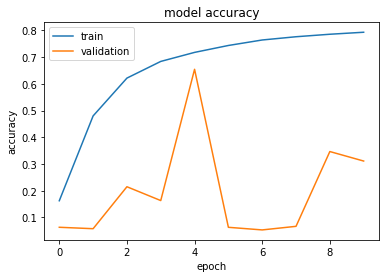

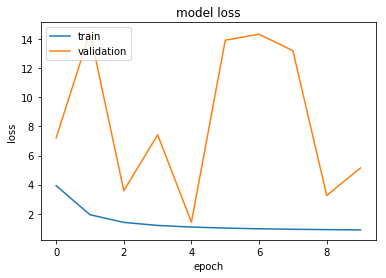

In [0]:
batch_size=64
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=10,\
                    verbose=1,validation_data=(X_test,Y_test))
# history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=10, batch_size=64)
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
data_file = '/content/drive/My Drive/pickles/test_berkeley_skeleton_images.pickle' # redefined varaible in case you have completed above steps previously.
print('Trying to load pickle from %s' % data_file)
with open(data_file, 'rb') as file:
    svhn_datasets = pickle.load(file)
    test_dataset = svhn_datasets['test_dataset']
    
print('Pickle Loaded Successfully!')
del svhn_datasets
x_test = test_dataset['X_test']

x_all = np.asarray(x_test)
Y = pd.read_csv('/content/drive/My Drive/y_test.csv', header=None).values
print(x_all.shape)
print(Y.shape)

X=x_all.reshape(x_all.shape[0], x_all.shape[1], x_all.shape[2], 1)

# Y = np.array(list(map(one_hot_vec, Y)))
Y = keras.utils.to_categorical(Y, num_classes=11)
print(X.shape)
print(Y.shape)

In [0]:
scores = model.evaluate(X, Y, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

In [0]:
model_json = model.to_json()
with open('drive/My Drive/models/alexnet_2.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('drive/My Drive/models/alexnet_2.h5')